In [1]:
import numpy as np 

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df.head()

,pickup_datetime,dropoff_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,traffic_congestion_level,pickup_borough,dropoff_borough,tolls_amount,tip_amount,fare_estimate,trip_distance_miles
0,3/22/24 9:10,3/22/24 9:23,40.690045,-74.239699,40.704018,-74.214368,2,high,Other,Other,0.00,0.14,18.40,10.9422
1,8/14/24 10:48,8/14/24 10:52,40.763224,-74.053604,40.759277,-74.066002,1,medium,Other,Other,0.00,1.36,9.99,1.2817
2,6/17/24 3:47,6/17/24 3:55,40.658970,-74.179122,40.628631,-74.180385,1,low,Other,Staten Island,5.67,2.36,20.22,13.8034
3,6/25/24 0:45,6/25/24 1:04,40.696980,-73.773970,40.670444,-73.838194,2,medium,Brooklyn,Brooklyn,0.00,3.80,29.73,24.2266
4,6/10/24 4:10,6/10/24 4:14,40.580638,-73.788101,40.594286,-73.780625,3,low,Brooklyn,Brooklyn,0.00,2.68,11.05,3.4222


In [6]:
df.shape

(14699, 14)

In [7]:
df.isnull().sum()

pickup_datetime             0
dropoff_datetime            0
pickup_latitude             0
pickup_longitude            0
dropoff_latitude            0
dropoff_longitude           0
passenger_count             0
traffic_congestion_level    0
pickup_borough              0
dropoff_borough             0
tolls_amount                0
tip_amount                  0
fare_estimate               0
trip_distance_miles         0
dtype: int64

In [8]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,tolls_amount,tip_amount,fare_estimate,trip_distance_miles
count,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000,14699.000000
mean,40.734509,-73.974803,40.735102,-73.974698,1.754201,1.156073,3.629243,23.465897,13.975935
std,0.106536,0.158391,0.110456,0.163223,1.025691,3.754118,2.878294,13.905790,7.900243
min,40.550003,-74.249989,40.450000,-74.350000,1.000000,0.000000,0.000000,4.660000,0.301800
25%,40.642862,-74.109936,40.643331,-74.110204,1.000000,0.000000,1.760000,14.070000,7.151200
50%,40.733822,-73.974071,40.733885,-73.974326,1.000000,0.000000,2.920000,19.780000,13.975000
75%,40.825650,-73.837649,40.826349,-73.837879,2.000000,0.000000,4.710000,28.690000,20.813350
max,40.919960,-73.700014,41.020000,-73.600000,6.000000,19.000000,30.810000,192.620000,27.670000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14699 entries, 0 to 14698
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pickup_datetime           14699 non-null  object 
 1   dropoff_datetime          14699 non-null  object 
 2   pickup_latitude           14699 non-null  float64
 3   pickup_longitude          14699 non-null  float64
 4   dropoff_latitude          14699 non-null  float64
 5   dropoff_longitude         14699 non-null  float64
 6   passenger_count           14699 non-null  int64  
 7   traffic_congestion_level  14699 non-null  object 
 8   pickup_borough            14699 non-null  object 
 9   dropoff_borough           14699 non-null  object 
 10  tolls_amount              14699 non-null  float64
 11  tip_amount                14699 non-null  float64
 12  fare_estimate             14699 non-null  float64
 13  trip_distance_miles       14699 non-null  float64
dtypes: flo

In [10]:
df.nunique()

pickup_datetime             14479
dropoff_datetime            14521
pickup_latitude             14409
pickup_longitude            14525
dropoff_latitude            14451
dropoff_longitude           14494
passenger_count                 6
traffic_congestion_level        3
pickup_borough                  5
dropoff_borough                 5
tolls_amount                  909
tip_amount                   1358
fare_estimate                4349
trip_distance_miles         14699
dtype: int64

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14694    False
14695    False
14696    False
14697    False
14698    False
Length: 14699, dtype: bool

In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype =='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype !='O']

print('we have {} numerical feature : {}' .format(len(numeric_features),numeric_features))
print('\nwe have {} categorical feature : {}' .format(len(categorical_features),categorical_features))

we have 5 numerical feature : ['pickup_datetime', 'dropoff_datetime', 'traffic_congestion_level', 'pickup_borough', 'dropoff_borough']

we have 9 categorical feature : ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'tolls_amount', 'tip_amount', 'fare_estimate', 'trip_distance_miles']


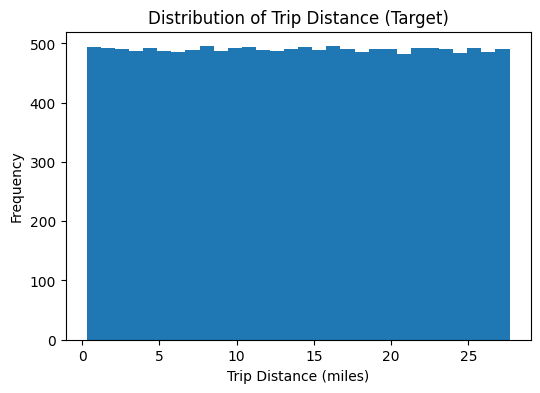

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["trip_distance_miles"], bins=30)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance (Target)")
plt.show()


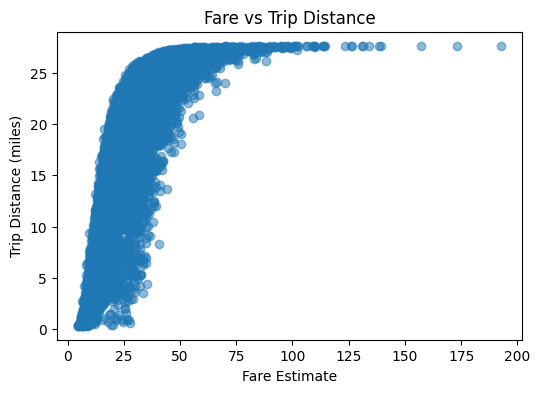

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df["fare_estimate"], df["trip_distance_miles"], alpha=0.5)
plt.xlabel("Fare Estimate")
plt.ylabel("Trip Distance (miles)")
plt.title("Fare vs Trip Distance")
plt.show()


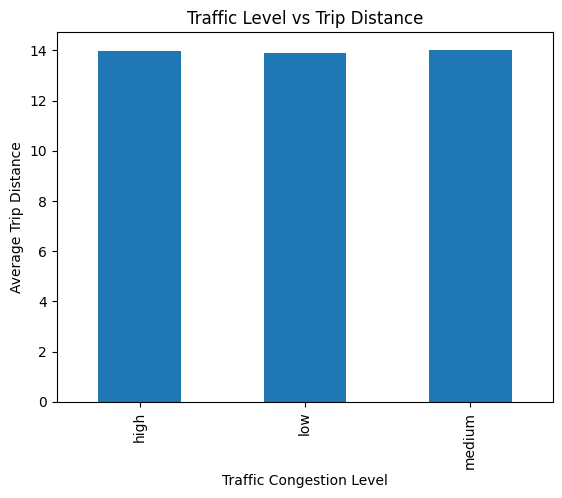

In [15]:
df.groupby("traffic_congestion_level")["trip_distance_miles"].mean().plot(kind="bar")
plt.xlabel("Traffic Congestion Level")
plt.ylabel("Average Trip Distance")
plt.title("Traffic Level vs Trip Distance")
plt.show()


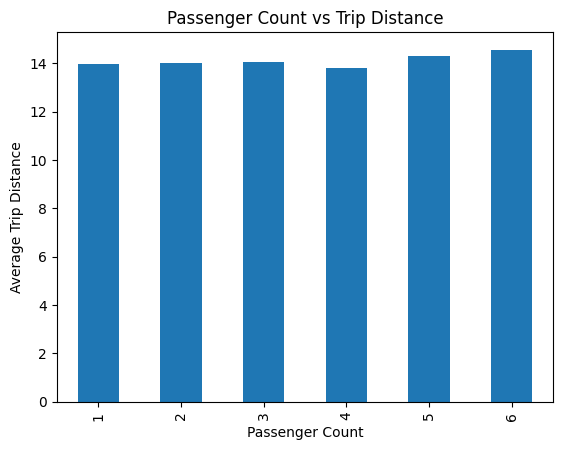

In [16]:
df.groupby("passenger_count")["trip_distance_miles"].mean().plot(kind="bar")
plt.xlabel("Passenger Count")
plt.ylabel("Average Trip Distance")
plt.title("Passenger Count vs Trip Distance")
plt.show()


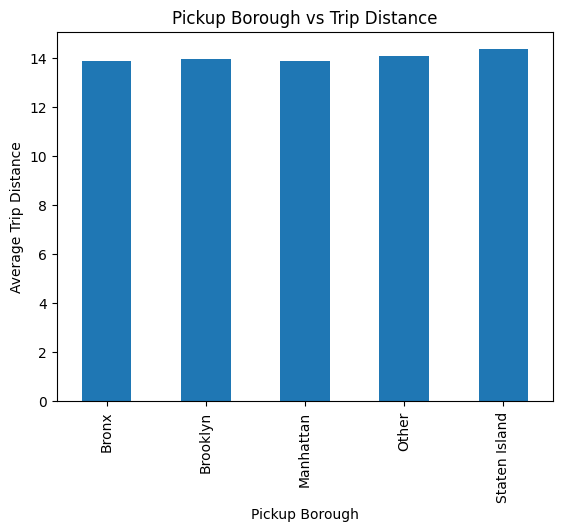

In [17]:
df.groupby("pickup_borough")["trip_distance_miles"].mean().plot(kind="bar")
plt.xlabel("Pickup Borough")
plt.ylabel("Average Trip Distance")
plt.title("Pickup Borough vs Trip Distance")
plt.show()


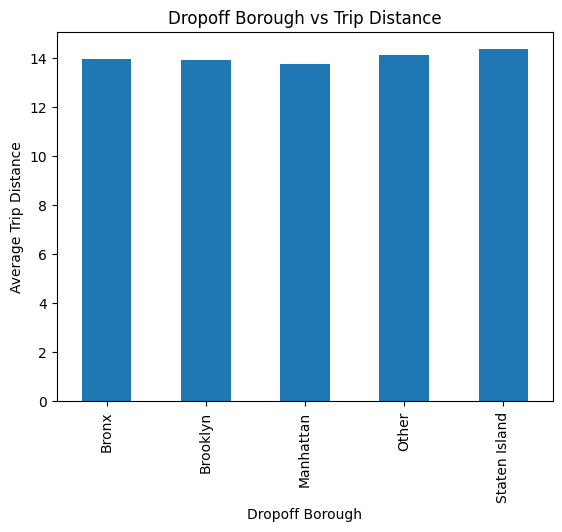

In [18]:
df.groupby("dropoff_borough")["trip_distance_miles"].mean().plot(kind="bar")
plt.xlabel("Dropoff Borough")
plt.ylabel("Average Trip Distance")
plt.title("Dropoff Borough vs Trip Distance")
plt.show()
